<a href="https://colab.research.google.com/github/HongKanokkarn/ML_CIFAR10/blob/main/css324f21_hw_ml_6222790147%266222790428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6222790147 & 6222790428
# Kanonkkarn Pinkeaw & Tandin Dorji
# CSS324 Homework Assignment

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


7


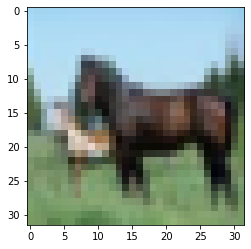

In [ ]:
# Plot a training example
x = x_train[12, :, :, :]
y = y_train[12][0]

plt.imshow(x)
print(y)        # 7 = horse

## Question 1

Construct a deep neural network containing three hidden layer to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes in three layers, appropriate activation functions, regularizers. Use 20% of the training set to validate the model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
#define the training examples

# Your implementation for Question 1
tf.random.set_seed(11)

#Normalize the dataset
x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))

y_train = y_train[:,0,:]
y_test = y_test[:,0,:]






In [ ]:
#Define a model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])


In [ ]:
#Train the model
history = model.fit(x_train, y_train, epochs= 200,
                    batch_size=1024, shuffle=True,
                    validation_split=0.2)



Epoch 1/200
40/40 [==============================] - 5s 30ms/step - loss: 2.5193 - accuracy: 0.1963 - val_loss: 2.4922 - val_accuracy: 0.1818
Epoch 2/200
40/40 [==============================] - 1s 19ms/step - loss: 2.1570 - accuracy: 0.2679 - val_loss: 1.9651 - val_accuracy: 0.3313
Epoch 3/200
40/40 [==============================] - 1s 19ms/step - loss: 2.0271 - accuracy: 0.2999 - val_loss: 1.8924 - val_accuracy: 0.3693
Epoch 4/200
40/40 [==============================] - 1s 19ms/step - loss: 1.9412 - accuracy: 0.3279 - val_loss: 1.8236 - val_accuracy: 0.3905
Epoch 5/200
40/40 [==============================] - 1s 19ms/step - loss: 1.8810 - accuracy: 0.3440 - val_loss: 1.7775 - val_accuracy: 0.4094
Epoch 6/200
40/40 [==============================] - 1s 19ms/step - loss: 1.8419 - accuracy: 0.3566 - val_loss: 1.7175 - val_accuracy: 0.4276
Epoch 7/200
40/40 [==============================] - 1s 19ms/step - loss: 1.7984 - accuracy: 0.3732 - val_loss: 1.6705 - val_accuracy: 0.4388
Epoch 

In [ ]:
#Evaluate the model

print("Training Accuracy")
print(model.evaluate(x_train, y_train, verbose = 0))
print(" ")
print("Test Accuracy")
print(model.evaluate(x_test, y_test, verbose = 0))

Training Accuracy
[1.0568543672561646, 0.6757799983024597]
 
Test Accuracy
[1.3951107263565063, 0.5389000177383423]


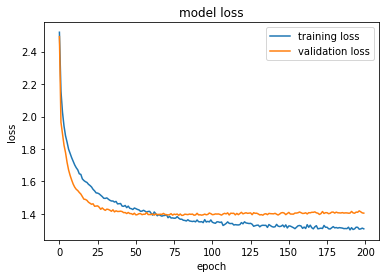

{'loss': [2.519322633743286, 2.156991720199585, 2.0270960330963135, 1.9411834478378296, 1.8809804916381836, 1.8419214487075806, 1.7983639240264893, 1.7725508213043213, 1.7462592124938965, 1.7237138748168945, 1.70149564743042, 1.6842585802078247, 1.670975923538208, 1.6468654870986938, 1.6433686017990112, 1.615455150604248, 1.6054155826568604, 1.5984315872192383, 1.5936591625213623, 1.582226037979126, 1.5748300552368164, 1.5657240152359009, 1.5511400699615479, 1.541619896888733, 1.5292813777923584, 1.5279346704483032, 1.5231307744979858, 1.5150519609451294, 1.506561279296875, 1.4961538314819336, 1.4953796863555908, 1.4984376430511475, 1.490368366241455, 1.4836795330047607, 1.479182243347168, 1.4792828559875488, 1.472546935081482, 1.47672700881958, 1.4615787267684937, 1.4625095129013062, 1.4636621475219727, 1.4478023052215576, 1.4464226961135864, 1.4517852067947388, 1.4384338855743408, 1.4477484226226807, 1.4344733953475952, 1.431949257850647, 1.4268882274627686, 1.4360120296478271, 1.432

In [ ]:
# Plot the training loss and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

#Display all loss and val_loss values
print(history.history)

## Question 2

Construct a convolutional neural network using your own structure. Try to maximize the prediction accuracy of your model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
tf.random.set_seed(11)
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

# Reshape input to be (width, height, #channels)
x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))


#Normalize the dataset
y_train = y_train[:,0,:]
y_test = y_test[:,0,:]


In [ ]:
tf.random.set_seed(11)
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 12, 12, 128)     

In [ ]:
# Train the model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(x_train, y_train, epochs=200,
                    batch_size=512, shuffle = True,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback])




Epoch 1/200
79/79 [==============================] - 34s 71ms/step - loss: 1.9103 - accuracy: 0.3823 - val_loss: 2.9161 - val_accuracy: 0.0975
Epoch 2/200
79/79 [==============================] - 5s 63ms/step - loss: 1.4742 - accuracy: 0.5041 - val_loss: 3.2929 - val_accuracy: 0.0967
Epoch 3/200
79/79 [==============================] - 5s 64ms/step - loss: 1.3309 - accuracy: 0.5510 - val_loss: 3.0638 - val_accuracy: 0.1183
Epoch 4/200
79/79 [==============================] - 5s 64ms/step - loss: 1.2442 - accuracy: 0.5824 - val_loss: 3.0171 - val_accuracy: 0.1505
Epoch 5/200
79/79 [==============================] - 5s 64ms/step - loss: 1.1796 - accuracy: 0.6088 - val_loss: 2.2696 - val_accuracy: 0.3049
Epoch 6/200
79/79 [==============================] - 5s 64ms/step - loss: 1.1331 - accuracy: 0.6241 - val_loss: 1.9589 - val_accuracy: 0.3723
Epoch 7/200
79/79 [==============================] - 5s 64ms/step - loss: 1.0987 - accuracy: 0.6402 - val_loss: 1.3442 - val_accuracy: 0.5394
Epoch

In [ ]:

print("Training Accuracy")
print(model.evaluate(x_train, y_train, verbose=0))


print("Test Accuracy")
print(model.evaluate(x_test, y_test, verbose=0))


#Print Training History
print(history.history)


Training Accuracy
[0.3549463152885437, 0.9505599737167358]
Test Accuracy
[0.8449485301971436, 0.77920001745224]
{'loss': [1.9102667570114136, 1.4742317199707031, 1.3309202194213867, 1.2442190647125244, 1.1796143054962158, 1.1331473588943481, 1.0987190008163452, 1.060181975364685, 1.0338506698608398, 1.0030226707458496, 0.9879653453826904, 0.9671393632888794, 0.952724814414978, 0.9216055870056152, 0.9040008783340454, 0.8906147480010986, 0.8749070167541504, 0.8643665909767151, 0.8521974682807922, 0.8316007852554321, 0.8255022168159485, 0.8092015981674194, 0.797347903251648, 0.7708078026771545, 0.7658625245094299, 0.763022243976593, 0.7454783916473389, 0.7400557994842529, 0.7289069890975952, 0.7169638872146606, 0.7133325338363647, 0.6997507810592651, 0.6980090141296387, 0.6856001019477844, 0.678419828414917, 0.6731963753700256, 0.6680532693862915, 0.6690765619277954, 0.6541242003440857, 0.6477046608924866, 0.6441466808319092, 0.644120454788208, 0.6342241764068604, 0.6169238686561584, 0.60

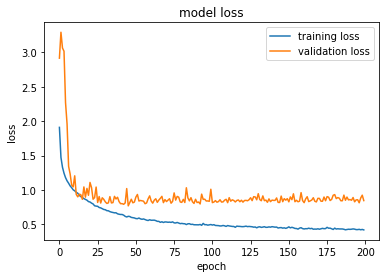

In [ ]:
# Plot the training loss and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_train, y_train, verbose=2)
print(test_acc)

1563/1563 - 7s - loss: 0.3549 - accuracy: 0.9506 - 7s/epoch - 4ms/step
0.9505599737167358
